In [77]:
# Data Analysis & Visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MODEL BUILDING
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score

# Visualization modifires
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [78]:
df = pd.read_csv('./data.csv')

# Dataset Information

In [79]:
# Shape of the data :
df.shape

(34801, 11)

In [80]:
# Dataframe information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34801 entries, 0 to 34800
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34801 non-null  int64  
 1   job             34801 non-null  object 
 2   marital         34801 non-null  object 
 3   education_qual  34801 non-null  object 
 4   call_type       34801 non-null  object 
 5   day             34801 non-null  int64  
 6   mon             34801 non-null  object 
 7   dur             34801 non-null  int64  
 8   num_calls       34800 non-null  float64
 9   prev_outcome    34800 non-null  object 
 10  y               34800 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 2.9+ MB


In [81]:
# Describing the data :
df.describe()

,age,day,dur,num_calls
count,34801.000000,34801.000000,34801.000000,34800.000000
mean,40.918278,16.513807,255.350191,2.972414
std,9.679478,8.508416,261.471650,3.393025
min,19.000000,1.000000,0.000000,1.000000
25%,33.000000,9.000000,100.000000,1.000000
50%,39.000000,17.000000,174.000000,2.000000
75%,48.000000,23.000000,312.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [82]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [83]:
for col in df.select_dtypes(include= np.number).columns:
  print(f'{col} : {df[col].unique()}')

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
dur : [ 261  151   76 ... 1240 1100  954]
num_calls : [ 1.  2.  3.  5.  4.  6.  7.  8.  9. 10. 11. 12. 13. 19. 14. 24. 16. 32.
 18. 22. 15. 17. 25. 21. 43. 51. 63. 41. 26. 28. 55. 50. 38. 23. 20. 29.
 31. 37. 30. 46. 27. 58. 33. 35. 34. 36. 39. 44. nan]


In [84]:
df.nunique()

age                 70
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 11
dur               1495
num_calls           48
prev_outcome         4
y                    2
dtype: int64

In [85]:
for col in df.select_dtypes(exclude= np.number).columns:
  print(f'{col} : {df[col].unique()}')

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education_qual : ['tertiary' 'secondary' 'unknown' 'primary']
call_type : ['unknown' 'cellular' 'telephone']
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
prev_outcome : ['unknown' 'failure' 'other' 'success' nan]
y : ['no' 'yes' nan]


# Data Cleaning

In [86]:

# Checking for duplicates
num_duplicates = df.duplicated().sum()
print(f'There are {num_duplicates} duplicates in our dataset.')

There are 6 duplicates in our dataset.


In [87]:
# Removing duplicates
df = df.drop_duplicates()

In [88]:
# Checking for duplicates after removal
num_duplicates_after = df.duplicated().sum()
print(f'There are {num_duplicates_after} duplicates in our dataset.')

There are 0 duplicates in our dataset.


In [89]:
df.shape

(34795, 11)

In [90]:
# Checking for nulls
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         1
prev_outcome      1
y                 1
dtype: int64

There are 3 null values (One on each of these columns: num_calls, prev_outcome, y).
There are other missing values which are filled with unknown.

In [91]:
#counting the unknown values present in the dataframe
has_unknown = df == "unknown"
column_results = has_unknown.sum()
column_results

age                   0
job                 227
marital               0
education_qual     1378
call_type         12762
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      31589
y                     0
dtype: int64

In [92]:
for col in df.select_dtypes(exclude=np.number).columns:
    print(df[col].value_counts(), sep='\n', end='\n--------------------------------------------\n')

job
blue-collar      7773
management       7317
technician       6137
admin.           3792
services         3279
retired          1345
self-employed    1257
entrepreneur     1240
unemployed       1018
housemaid        1016
student           394
unknown           227
Name: count, dtype: int64
--------------------------------------------
marital
married     21629
single       9079
divorced     4087
Name: count, dtype: int64
--------------------------------------------
education_qual
secondary    18002
tertiary      9989
primary       5426
unknown       1378
Name: count, dtype: int64
--------------------------------------------
call_type
cellular     20114
unknown      12762
telephone     1919
Name: count, dtype: int64
--------------------------------------------
mon
may    8580
jul    6379
aug    5213
jun    4484
nov    3598
apr    2718
feb    2296
jan    1176
mar     258
oct      80
dec      13
Name: count, dtype: int64
--------------------------------------------
prev_outcome
unknown 

In [93]:
prev = df['prev_outcome'].value_counts()/len(df)*100
prev

prev_outcome
unknown    90.786032
failure     6.371605
other       2.302055
success     0.537434
Name: count, dtype: float64

In [94]:
for col in df.select_dtypes(include=np.number).columns:
    print(f'{df[col].value_counts().head()}\n--------------------------------------------')

age
32    1630
31    1589
33    1507
35    1490
34    1458
Name: count, dtype: int64
--------------------------------------------
day
20    2655
21    1914
17    1812
5     1691
19    1649
Name: count, dtype: int64
--------------------------------------------
dur
124    156
90     153
89     149
73     146
71     144
Name: count, dtype: int64
--------------------------------------------
num_calls
1.0    12381
2.0     9783
3.0     4371
4.0     2960
5.0     1424
Name: count, dtype: int64
--------------------------------------------


The null values should be replaced by the mean or the mode values. Since, there is a big variation in the value counts, the nulls are replaced by the mode.

In [95]:
df.replace("unknown", np.nan, inplace=True)
df.isnull().sum()

age                   0
job                 227
marital               0
education_qual     1378
call_type         12762
day                   0
mon                   0
dur                   0
num_calls             1
prev_outcome      31590
y                     1
dtype: int64

In [96]:
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [97]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [98]:
# Checking for outliers
df.describe()

,age,day,dur,num_calls
count,34795.000000,34795.000000,34795.000000,34795.000000
mean,40.919414,16.514528,255.375657,2.972467
std,9.679835,8.508221,261.486282,3.393235
min,19.000000,1.000000,0.000000,1.000000
25%,33.000000,9.000000,100.000000,1.000000
50%,39.000000,17.000000,174.000000,2.000000
75%,48.000000,23.000000,312.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [99]:
num_columns = df.select_dtypes(include=np.number).columns
num_columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

In [100]:
def Boxplot(col):
    plt.figure(figsize=(15, 10))
    for idx, i in enumerate(col, start=1):
        plt.subplot(2, 2, idx)
        sns.boxplot(x=df[i], palette='Paired')
        plt.title(f'Box plot of {i}', fontweight='black', fontsize=20, pad=20)
    plt.tight_layout()
    plt.show()

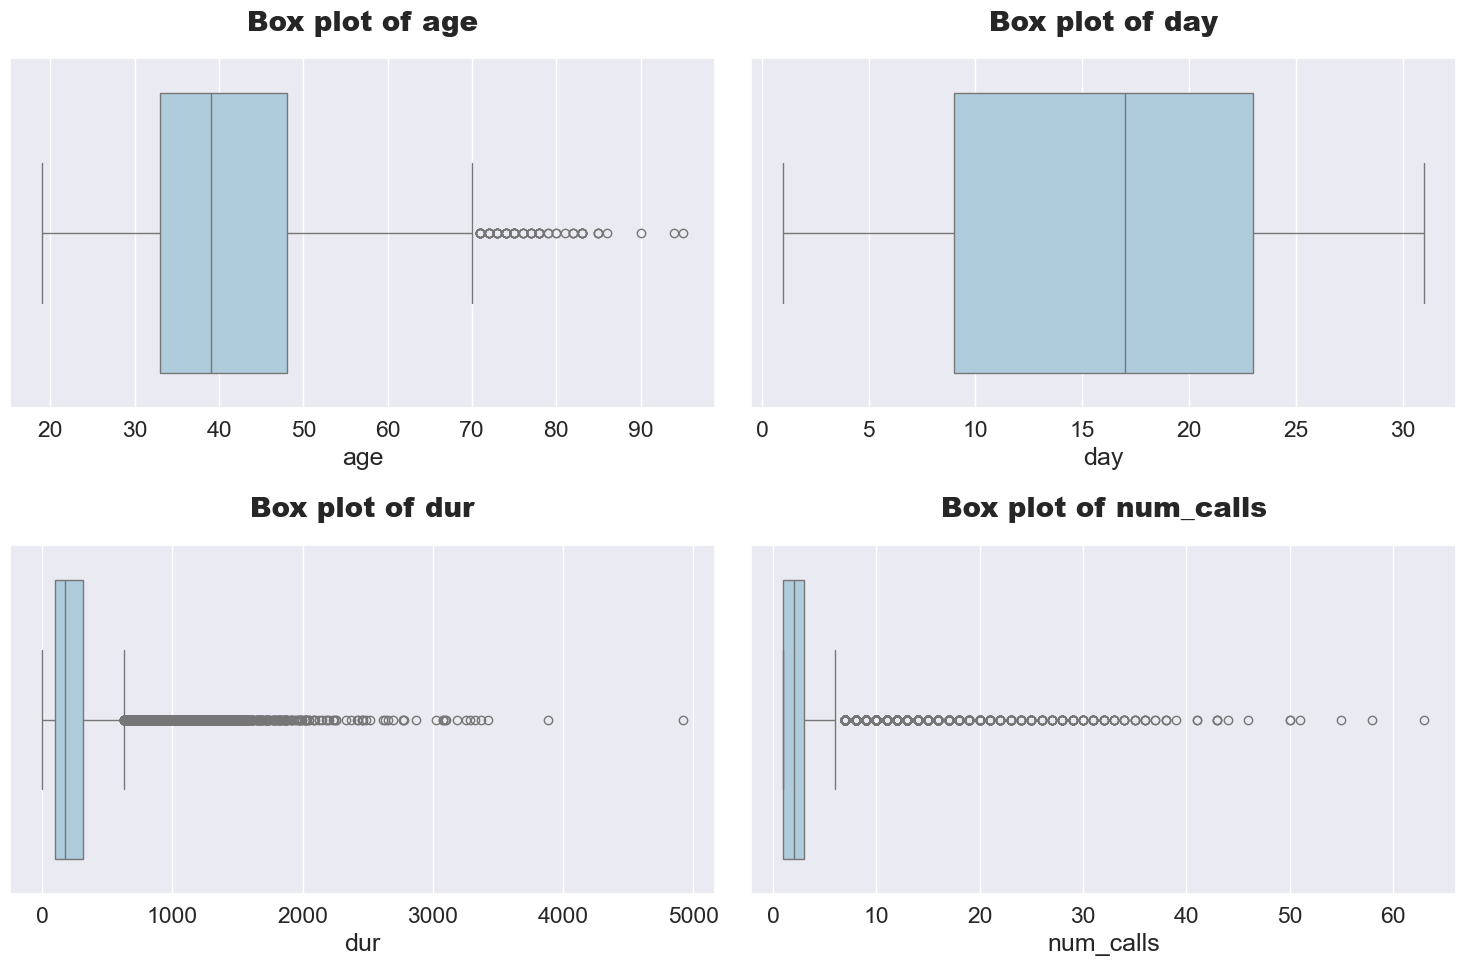

In [101]:
Boxplot(['age', 'day', 'dur', 'num_calls'])

In [102]:
# Removing outliers
out_columns = ['age','dur', 'num_calls']
for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])
  IQR =  q3 - q1 #(75 - 25)
  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Lower = q1 + 1.5 * IQR  #(75 + 1.5 * IQR)
  print(f'{i} = IQR : {IQR}, Lower Threshold : {Lower}, Upper Threshold : {Upper}')

age = IQR : 15.0, Lower Threshold : 55.5, Upper Threshold : 70.5
dur = IQR : 212.0, Lower Threshold : 418.0, Upper Threshold : 630.0
num_calls = IQR : 2.0, Lower Threshold : 4.0, Upper Threshold : 6.0


In [103]:
out_columns = ['age', 'dur', 'num_calls']

IQR_value = []
Lower_Threshold = []
Upper_Threshold = []

for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])

  IQR =  q3 - q1 #(75 - 25)
  IQR_value.append(IQR)

  Lower = q1 - 1.5 * IQR  #(75 - 1.5 * IQR)
  Lower_Threshold.append(Lower)

  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Upper_Threshold.append(Upper)

out = {'Column name' : out_columns, 'IQR' : IQR_value, 'Lower Threshold' : Lower_Threshold, 'Upper Threshold' : Upper_Threshold}
out_df = pd.DataFrame(out)
out_df

,Column name,IQR,Lower Threshold,Upper Threshold
0,age,15.0,10.5,70.5
1,dur,212.0,-218.0,630.0
2,num_calls,2.0,-2.0,6.0


In [104]:
# Clipping outliers
out_columns = ['age', 'day', 'dur', 'num_calls']

IQR_value = []
Lower_Threshold = []
Upper_Threshold = []

for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])

  IQR =  q3 - q1 #(75 - 25)
  IQR_value.append(IQR)

  Lower = q1 - 1.5 * IQR  #(75 - 1.5 * IQR)
  Lower_Threshold.append(Lower)

  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Upper_Threshold.append(Upper)
  df[i] = df[i].clip(Lower,Upper)
out = {'Column name' : out_columns, 'IQR' : IQR_value, 'Lower Threshold' : Lower_Threshold, 'Upper Threshold' : Upper_Threshold}
out_df = pd.DataFrame(out)
out_df

,Column name,IQR,Lower Threshold,Upper Threshold
0,age,15.0,10.5,70.5
1,day,14.0,-12.0,44.0
2,dur,212.0,-218.0,630.0
3,num_calls,2.0,-2.0,6.0


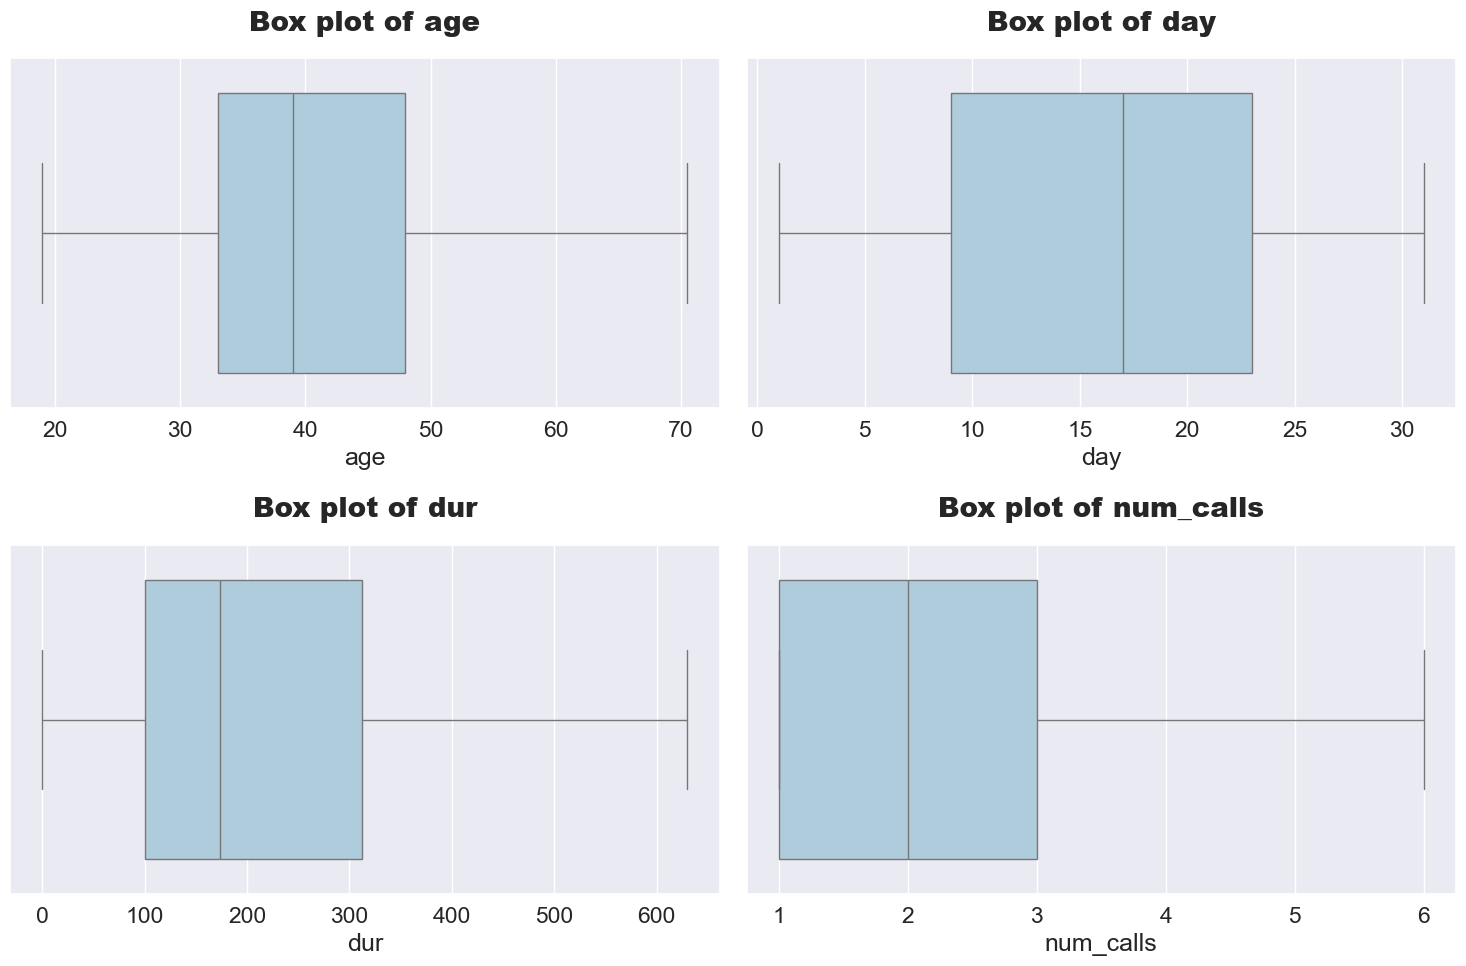

In [105]:
# Checking for outliers
Boxplot(['age', 'day', 'dur', 'num_calls'])

In [106]:
df.describe()

,age,day,dur,num_calls
count,34795.000000,34795.000000,34795.000000,34795.000000
mean,40.905317,16.514528,230.338181,2.508148
std,9.628838,8.508221,174.852873,1.647366
min,19.000000,1.000000,0.000000,1.000000
25%,33.000000,9.000000,100.000000,1.000000
50%,39.000000,17.000000,174.000000,2.000000
75%,48.000000,23.000000,312.000000,3.000000
max,70.500000,31.000000,630.000000,6.000000


# EDA

In [107]:
df['y'].value_counts()

y
no     32445
yes     2350
Name: count, dtype: int64

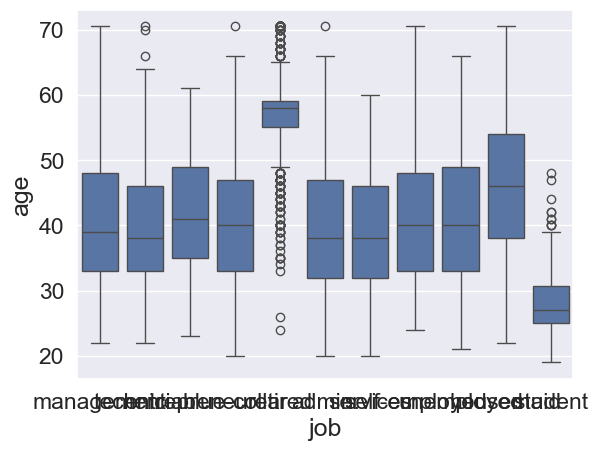

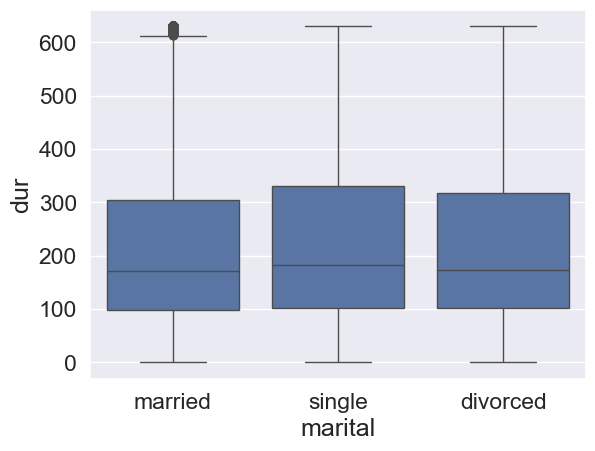

In [108]:
# Boxplots
sns.boxplot(x='job', y='age', data=df)
plt.show()

sns.boxplot(x='marital', y='dur', data=df)
plt.show()


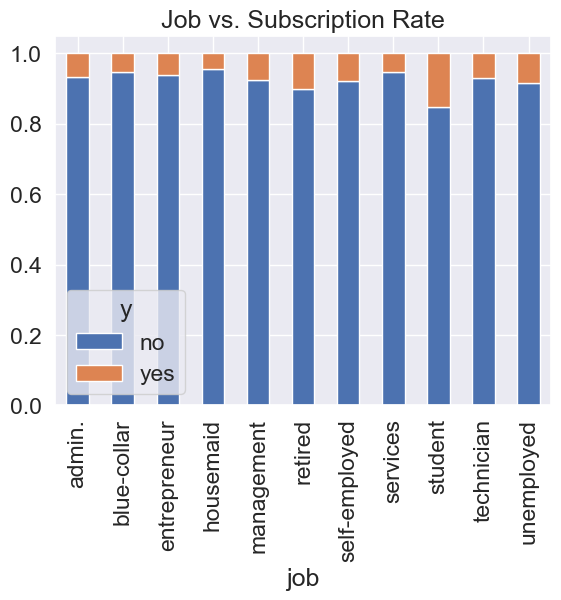

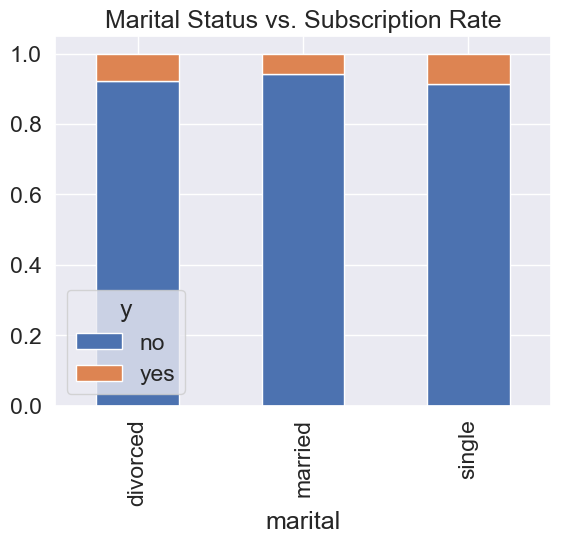

In [109]:
# Cross-tabulation of categorical features vs. target variable
pd.crosstab(df['job'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Job vs. Subscription Rate')
plt.show()

pd.crosstab(df['marital'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Marital Status vs. Subscription Rate')
plt.show()


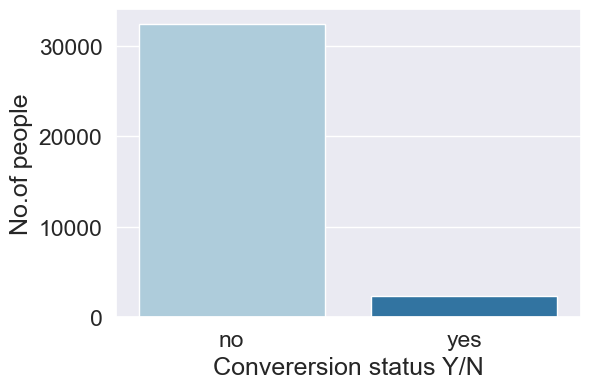

In [110]:
# Creating a count plot to visualise the distribution of conversion statuses (Y/N) from the 'y' column in the dataset
plt.figure(figsize=(6, 4))
sns.countplot(x=df['y'],palette='Paired')
plt.xlabel('Converersion status Y/N')
plt.ylabel('No.of people')
plt.show()

In [111]:
print("percentage of no in the target variable : ",((39922)/(39922+5289))*100)
print("percentage of yes in the target variable : ",((5289)/(39922+5289))*100) 

percentage of no in the target variable :  88.30151954170445
percentage of yes in the target variable :  11.698480458295547


In [112]:
categorical_columns = df.select_dtypes(exclude=np.number)
categorical_columns.head()

,job,marital,education_qual,call_type,mon,prev_outcome,y
0,management,married,tertiary,cellular,may,failure,no
1,technician,single,secondary,cellular,may,failure,no
2,entrepreneur,married,secondary,cellular,may,failure,no
3,blue-collar,married,secondary,cellular,may,failure,no
4,blue-collar,single,secondary,cellular,may,failure,no


In [113]:
# Function to visualise categorical_features

def categorical_features(col):
    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df, palette='Paired', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontweight='black', pad=20, fontsize=20)
    plt.xticks(rotation=90)

    total = len(df[col])
    for i in plt.gca().patches:
        height = i.get_height()
        percentage = f'{(height / total) * 100:.2f}%'
        plt.gca().annotate(percentage, (i.get_x() + i.get_width() / 2, height), ha='center', fontsize=8)

    plt.subplot(1, 2, 2)
    sns.countplot(x=col, hue='y', data=df, palette='Paired', order=df[col].value_counts().index)
    plt.title(f'{col} vs Target (y)', fontweight='black', pad=20, fontsize=20)
    plt.xticks(rotation=90)

    for i in plt.gca().patches:
        height = i.get_height()
        percentage = f'{(height / total) * 100:.2f}%'
        plt.gca().annotate(percentage, (i.get_x() + i.get_width() / 2, height), ha='center',fontsize=8)

    plt.tight_layout()
    plt.show()

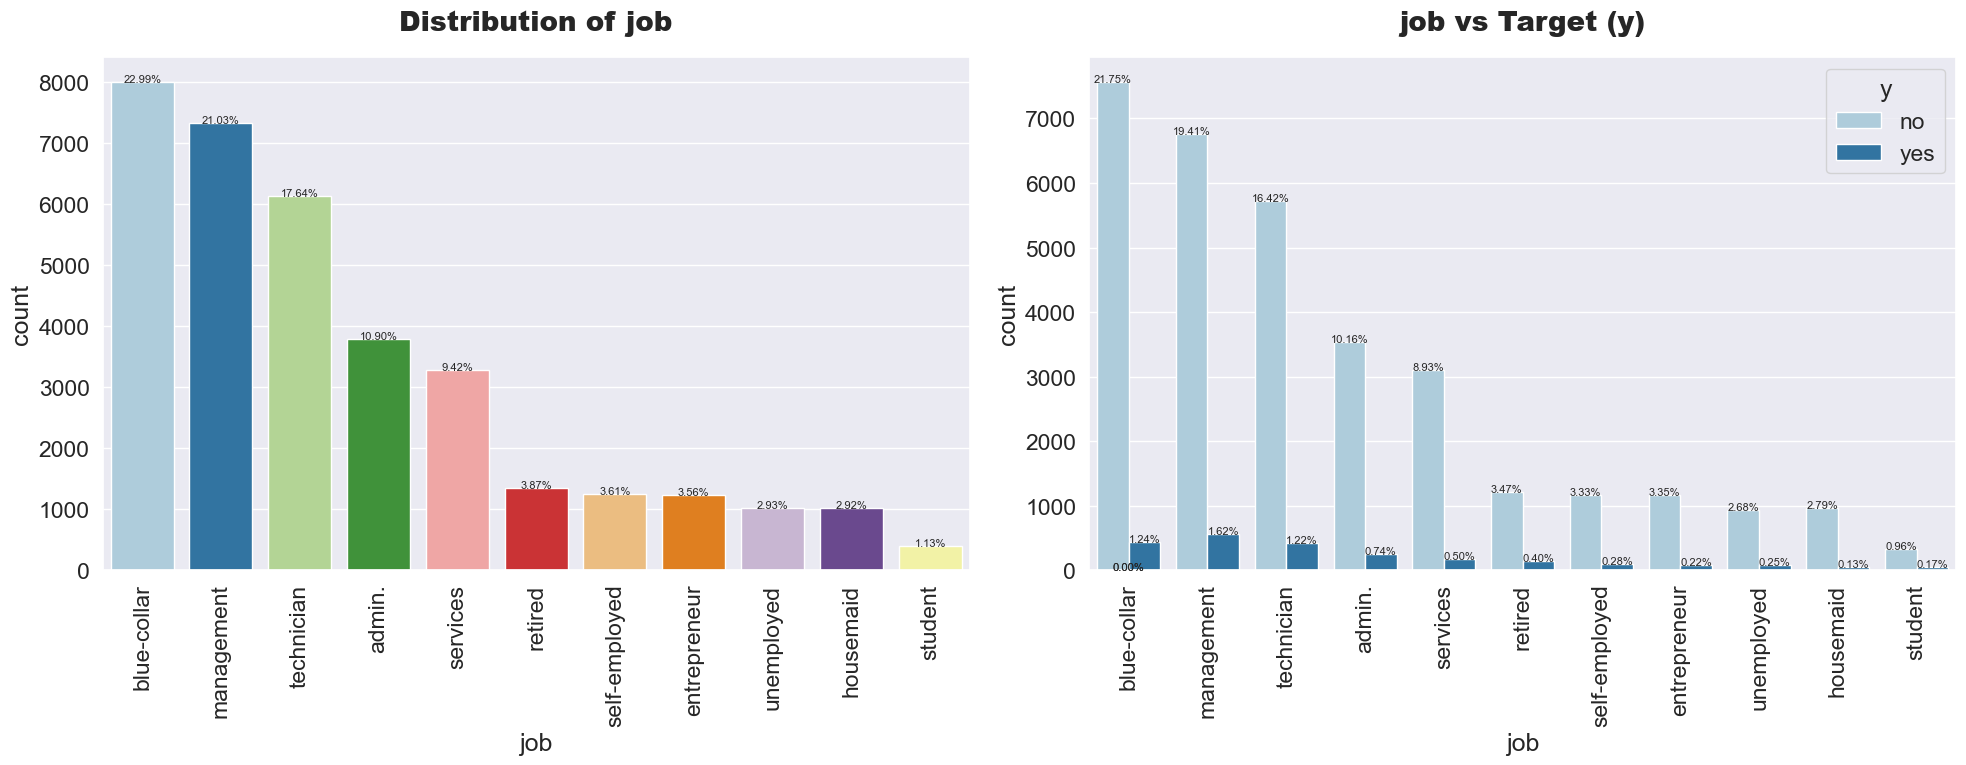

In [114]:
# Visualising job feature
categorical_features('job')

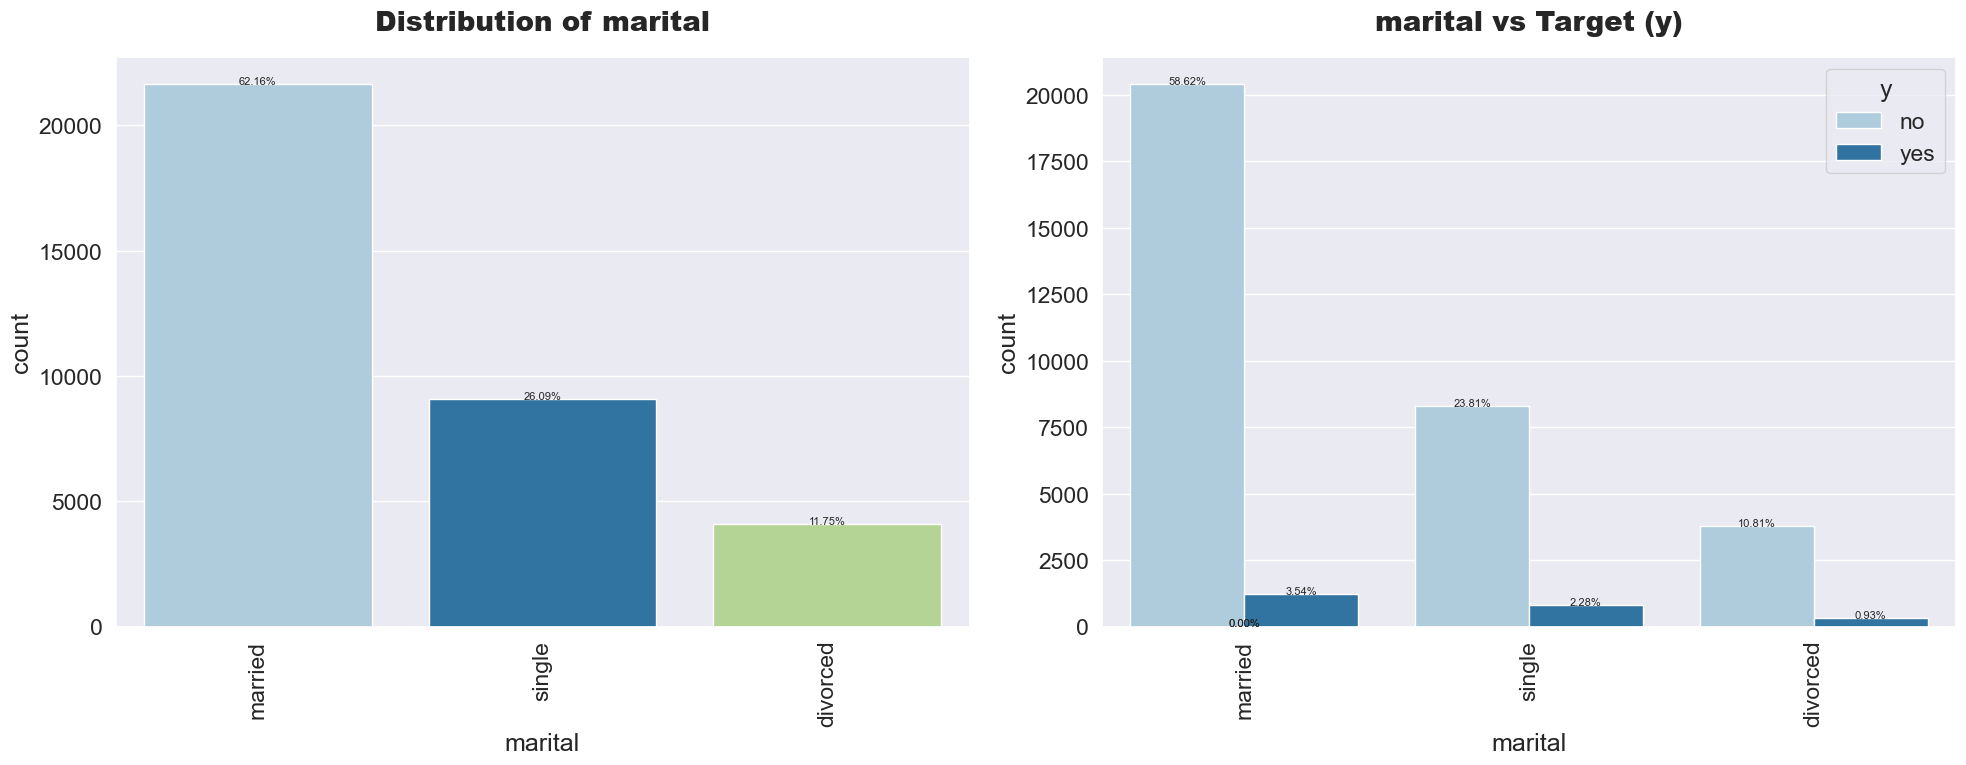

In [115]:
# Visualising marital feature
categorical_features('marital')

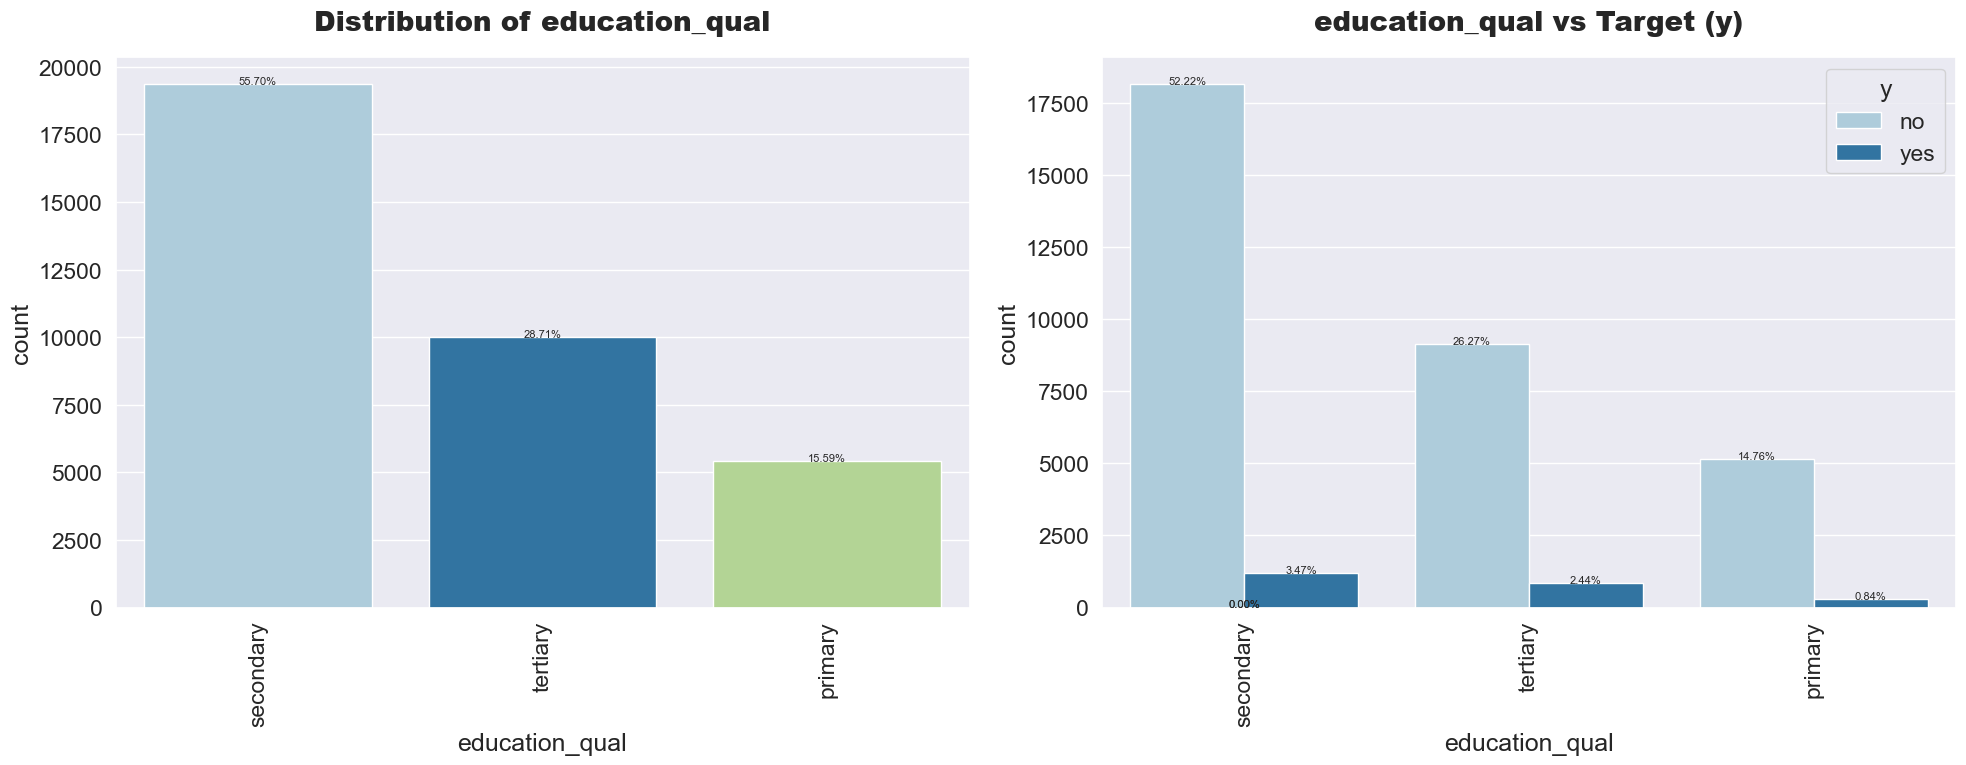

In [116]:
# Visualising education_qual feature
categorical_features('education_qual')

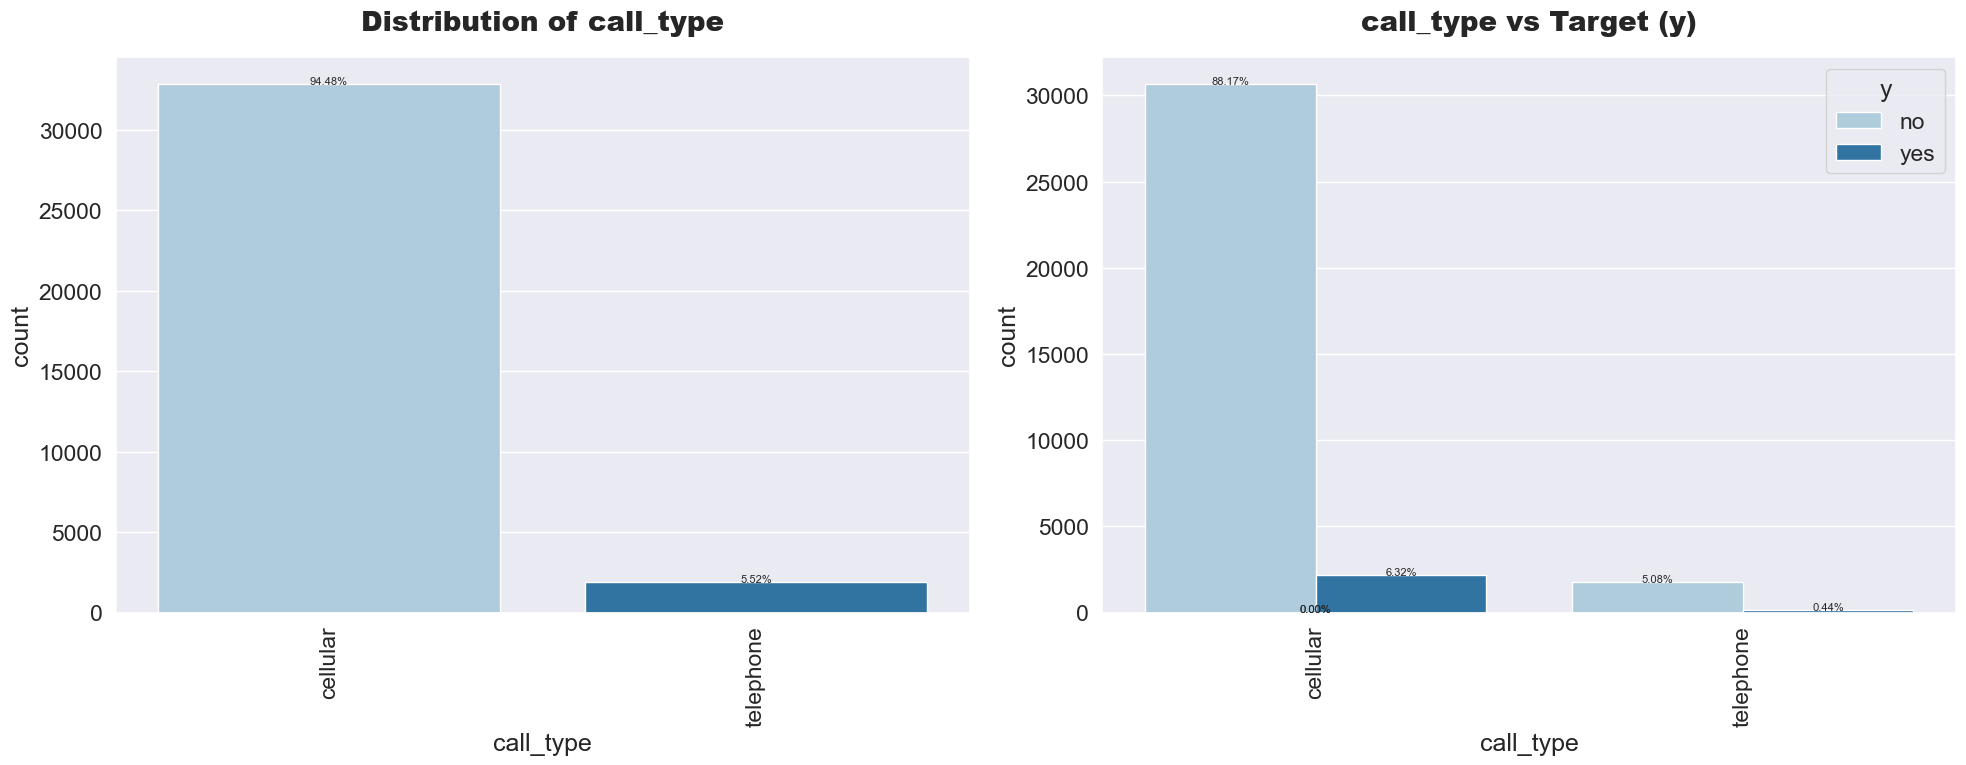

In [117]:
# Visualising call_type feature
categorical_features('call_type')

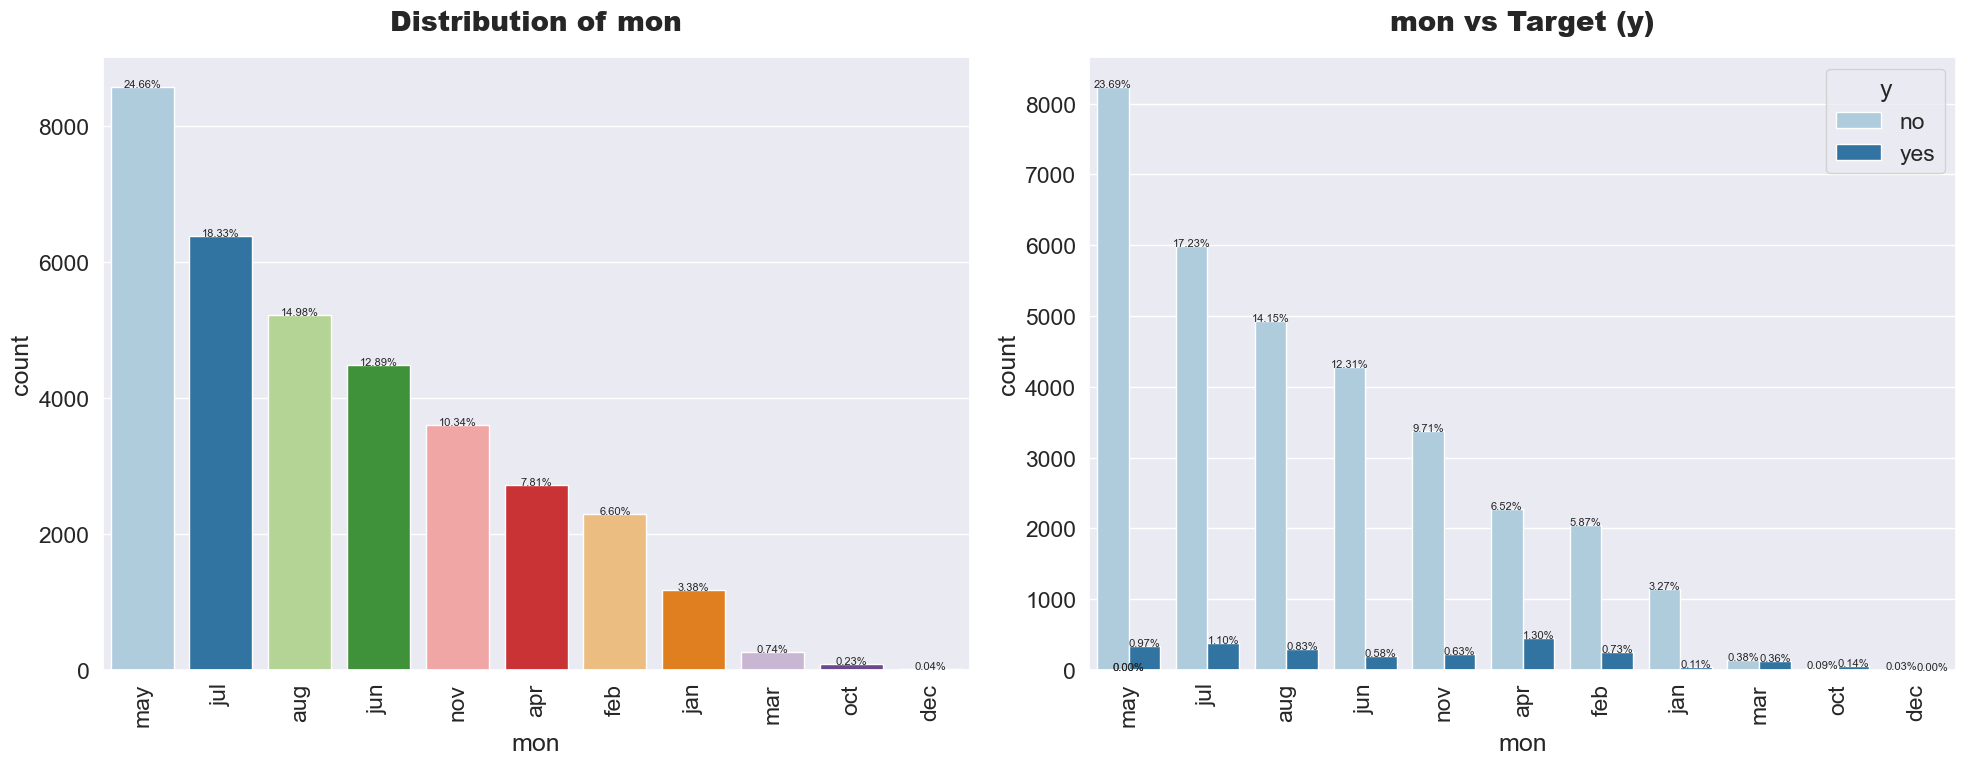

In [118]:
# Visualising mon feature
categorical_features('mon')

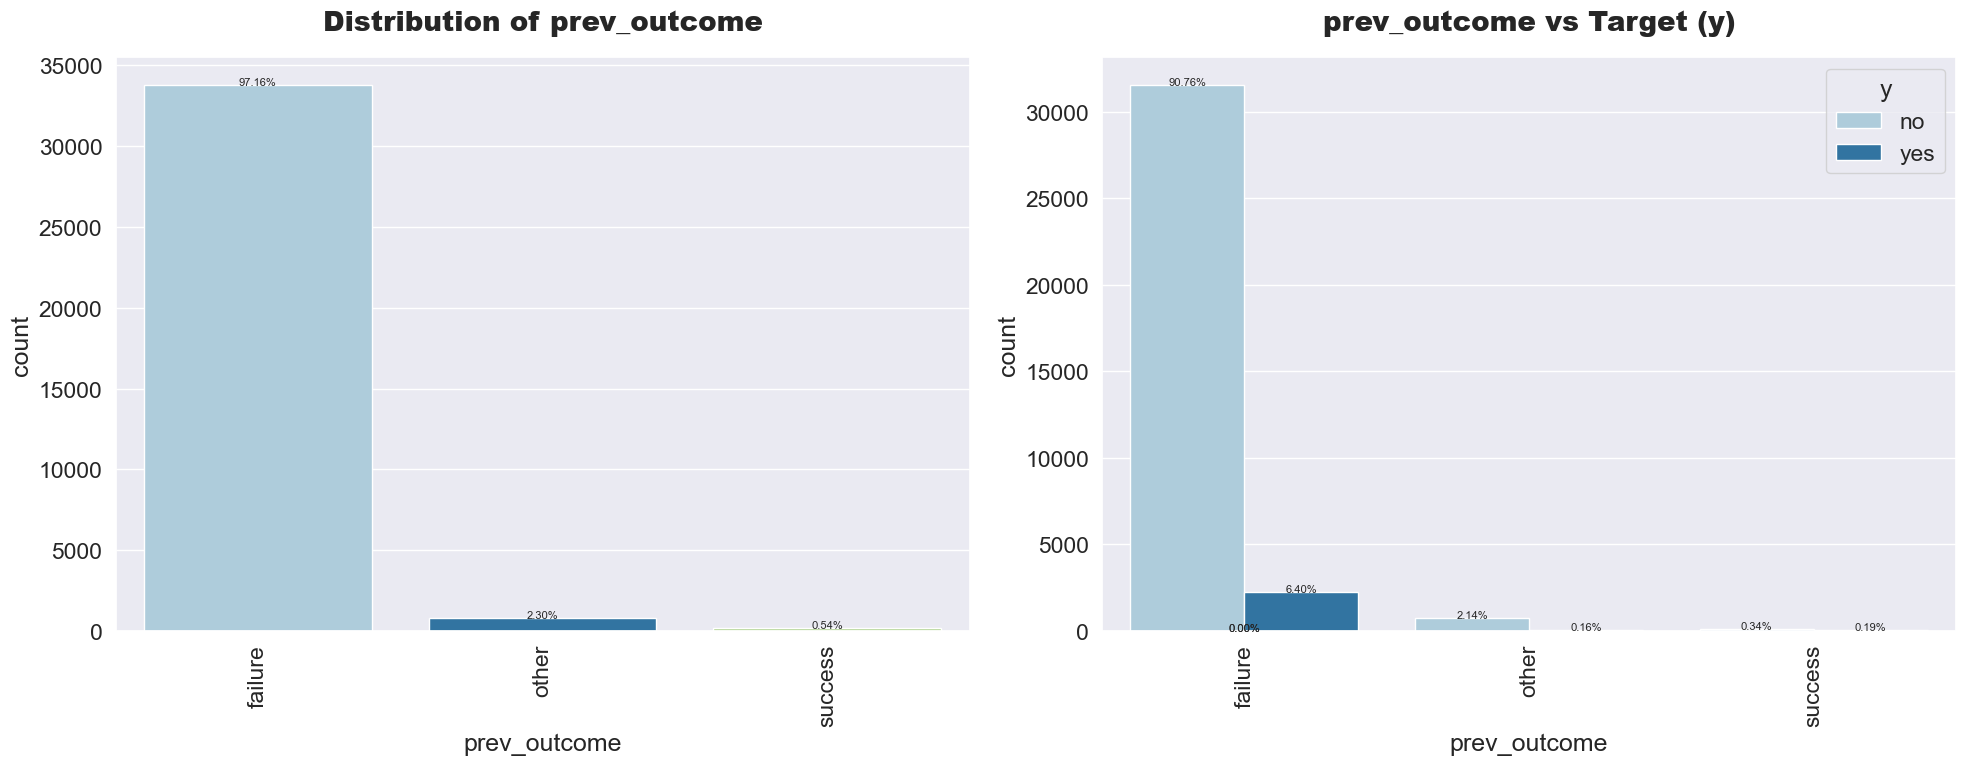

In [119]:
# Visualising prev_outcome feature
categorical_features('prev_outcome')

In [120]:
numerical_columns = df.select_dtypes(include=np.number)
numerical_columns.head()

,age,day,dur,num_calls
0,58.0,5,261,1.0
1,44.0,5,151,1.0
2,33.0,5,76,1.0
3,47.0,5,92,1.0
4,33.0,5,198,1.0


In [121]:
# Creating histograms for each numerical feature in the provided list of columns, with histograms showing the distribution of values and a KDE plot, separated by the hue 'y'
def Numerical_features(col):
  plt.figure(figsize=(20,17))
  x=1
  for i in col:
    plt.subplot(2,2,x)
    sns.histplot(x=i, hue='y', data=df, kde=True, edgecolor='black')
    plt.title(f'Histogram of {i}', fontweight='black', pad=10, fontsize=20 )
    plt.xticks(rotation=90)
    x += 1

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

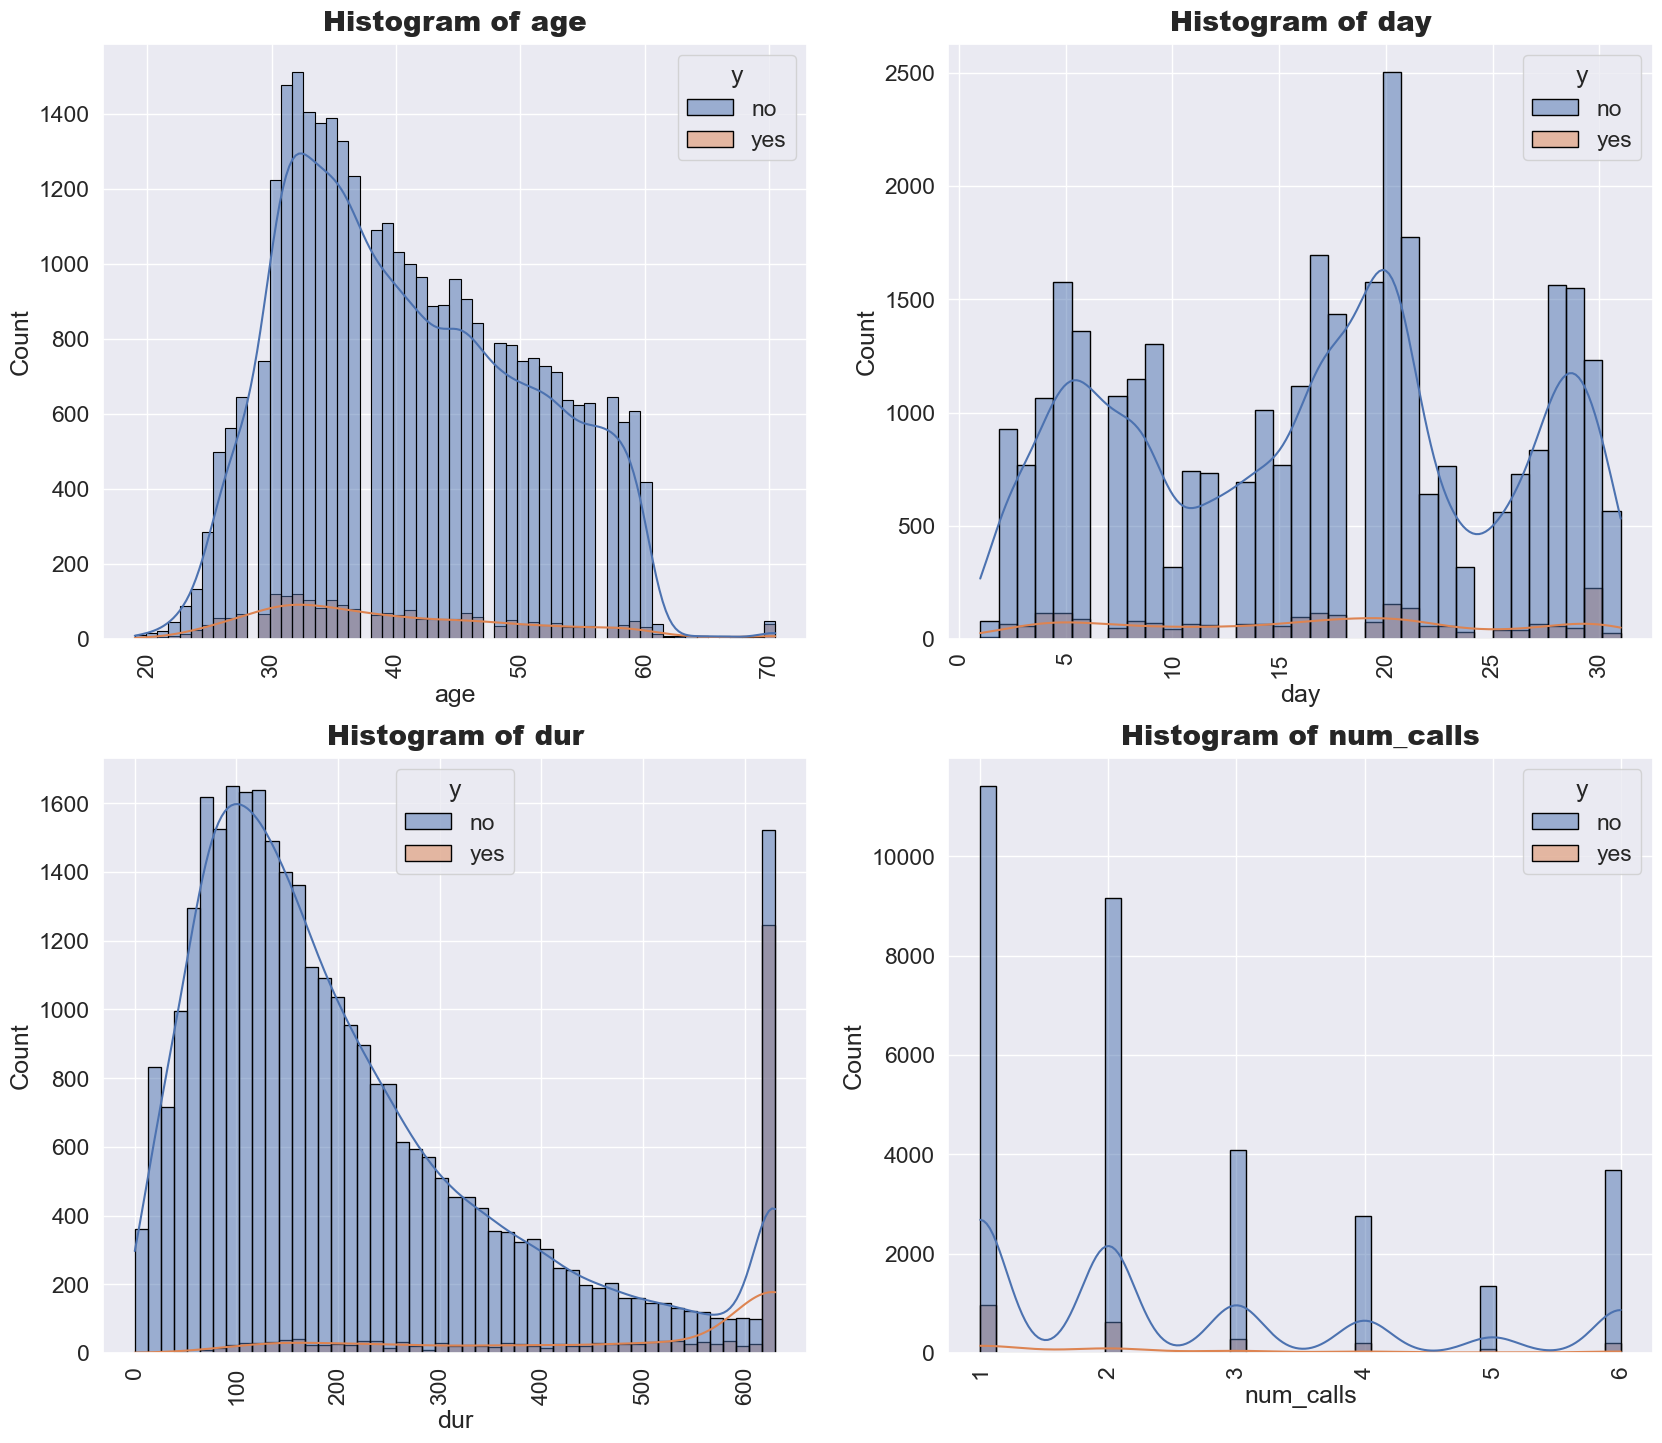

In [122]:
Numerical_features(['age', 'day', 'dur', 'num_calls'])

# Data Preprocessing

In [123]:
# Encoding
df['y'] = df['y'].map({'no':0, 'yes':1})

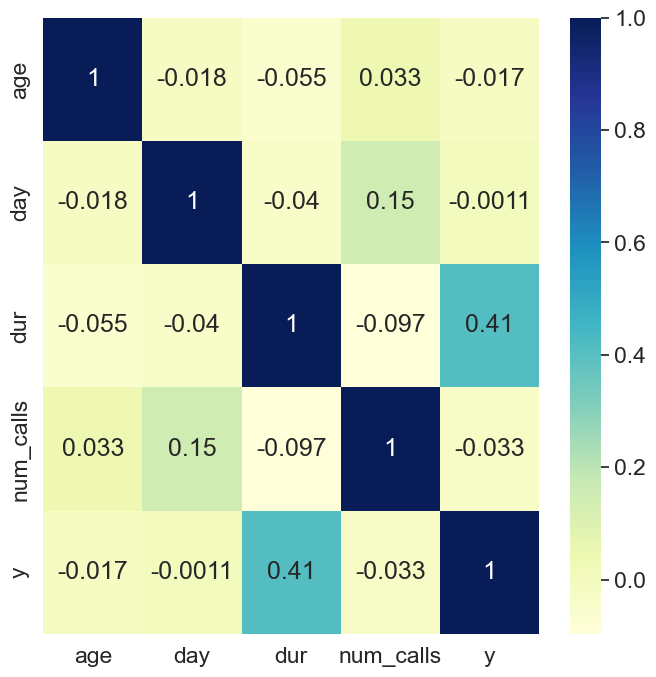

In [124]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(8, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.show()


In [125]:
cc = df.select_dtypes(exclude = np.number).columns
cc

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')

In [126]:
# Label encoding
label_encoder = LabelEncoder()
df['mon'] = label_encoder.fit_transform(df['mon'])

In [127]:
print(df.columns)

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')


In [128]:
df = pd.get_dummies(columns=['job', 'marital', 'education_qual', 'call_type', 'prev_outcome'], data=df)

In [129]:
df.head()

,age,day,mon,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_qual_primary,education_qual_secondary,education_qual_tertiary,call_type_cellular,call_type_telephone,prev_outcome_failure,prev_outcome_other,prev_outcome_success
0,58.0,5,8,261,1.0,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,False
1,44.0,5,8,151,1.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,False
2,33.0,5,8,76,1.0,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False
3,47.0,5,8,92,1.0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False
4,33.0,5,8,198,1.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False


In [130]:
# Sampling
X_S = df.drop(['y'],axis=1)
y_S = df['y']

In [131]:
smote = SMOTEENN(sampling_strategy="all")
X,y = smote.fit_resample(X_S,y_S)

In [132]:
print(len(X),len(y))

57358 57358


In [133]:
y.value_counts()

y
1    31335
0    26023
Name: count, dtype: int64

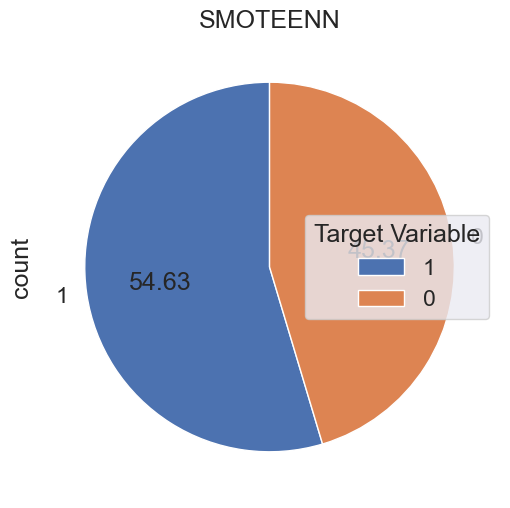

In [134]:
plt.figure(figsize=(6,6))
y.value_counts().plot.pie(autopct='%.2f',startangle = 90)
plt.title("SMOTEENN")
plt.legend(title = "Target Variable")
plt.show()

In [135]:
# Splitting
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [136]:
print('X_train shape -->', X_train.shape)
print('X_test shape -->', X_test.shape)
print('y_train shape -->', y_train.shape)
print('y_test shape -->', y_test.shape)

X_train shape --> (40150, 27)
X_test shape --> (17208, 27)
y_train shape --> (40150,)
y_test shape --> (17208,)


In [137]:
# Feature scaling
df.head()

,age,day,mon,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_qual_primary,education_qual_secondary,education_qual_tertiary,call_type_cellular,call_type_telephone,prev_outcome_failure,prev_outcome_other,prev_outcome_success
0,58.0,5,8,261,1.0,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,False
1,44.0,5,8,151,1.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,False
2,33.0,5,8,76,1.0,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False
3,47.0,5,8,92,1.0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False
4,33.0,5,8,198,1.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False


In [138]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [139]:
print(X_train)

[[ 0.62839165 -1.34296843  0.42457884 ...  0.13066624 -0.18408647
  -0.16916504]
 [ 0.13356376  1.47395722  1.41184759 ...  0.13066624 -0.18408647
  -0.16916504]
 [ 0.33145287  0.1828663  -1.22086908 ...  0.13066624 -0.18408647
  -0.16916504]
 ...
 [ 1.81614676 -1.10822462  1.08275801 ...  0.13066624 -0.18408647
  -0.16916504]
 [ 1.61818758 -0.63873701 -1.22086908 ...  0.13066624 -0.18408647
  -0.16916504]
 [-0.8760582  -1.69508413  0.42457884 ...  0.13066624 -0.18408647
  -0.16916504]]


In [140]:
print(X_test)

[[ 0.82635083  1.35658532 -0.23360033 ...  0.13066624 -0.18408647
  -0.16916504]
 [ 0.62839165 -1.69508413 -0.56268991 ...  0.13066624 -0.18408647
  -0.16916504]
 [ 0.33740922  0.4176101  -1.54995866 ...  0.13066624 -0.18408647
  -0.16916504]
 ...
 [-1.2918708   0.65235391  0.09548926 ...  0.13066624 -0.18408647
  -0.16916504]
 [ 0.20023595  0.53498201  1.41184759 ...  0.13066624 -0.18408647
  -0.16916504]
 [ 0.03451409 -1.46034033 -0.56268991 ... -7.6530865  -0.18408647
   5.91138682]]


# Model

##### Define Models and Fit Them

In [141]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGB': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'F1 Score': [], 'AUROC': [], 'Confusion Matrix': []}

# Fit models and store results
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_prob) * 100
    cm = confusion_matrix(y_test, y_pred)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['AUROC'].append(auroc)
    results['Confusion Matrix'].append(cm)

results_df = pd.DataFrame(results)


##### Visualise Confusion Matrices

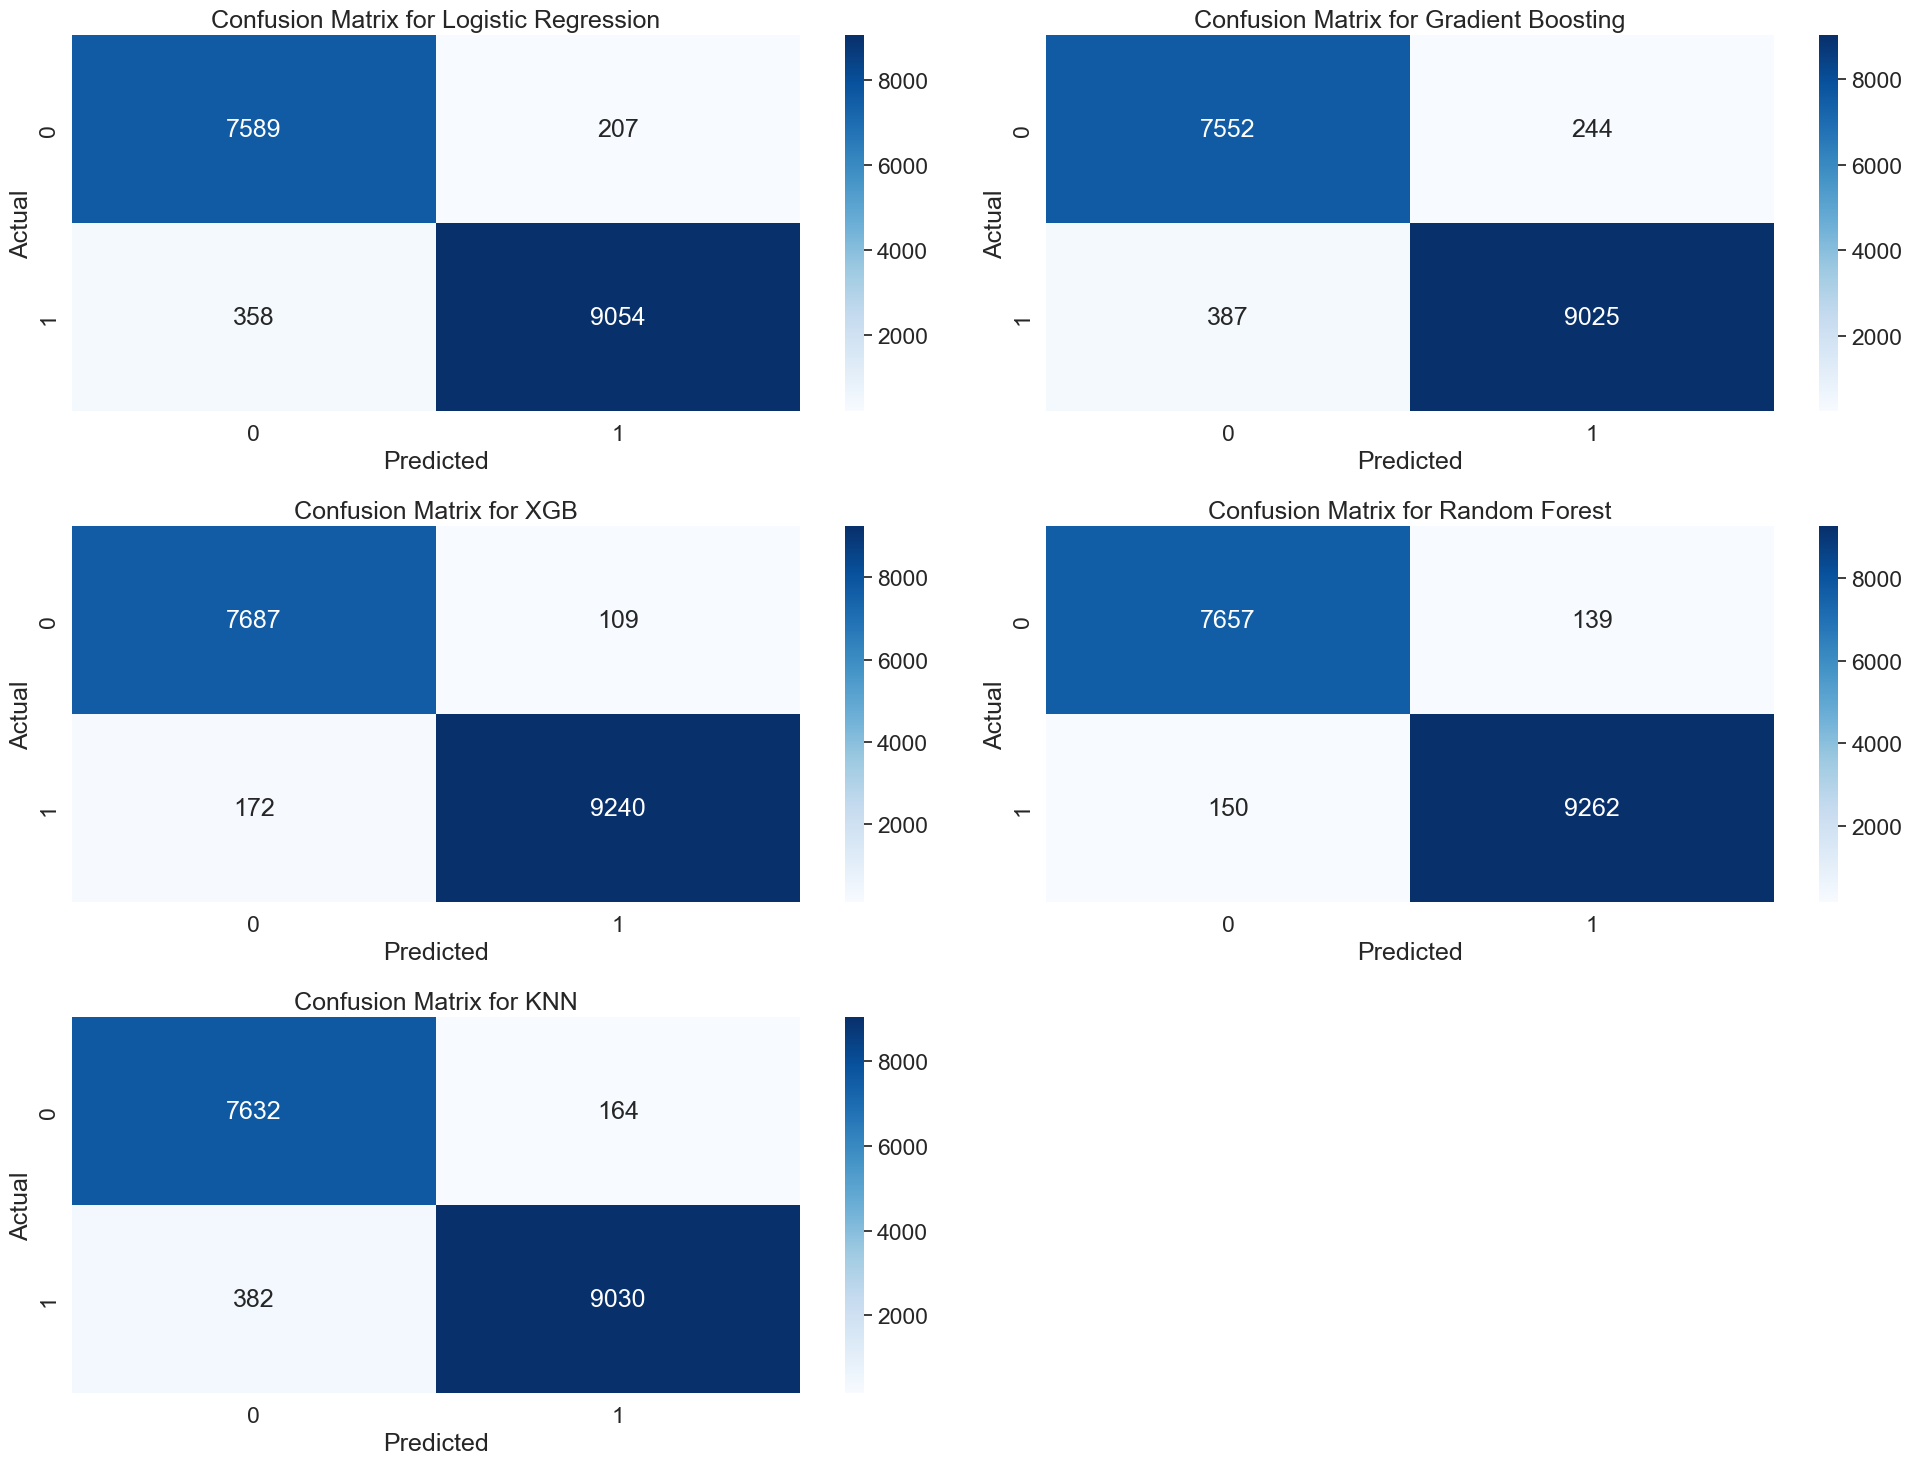

In [142]:
plt.figure(figsize=(20, 15))
for i, cm in enumerate(results_df['Confusion Matrix']):
    plt.subplot(3, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {results_df["Model"][i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()


##### Plot Cross-Validation Scores

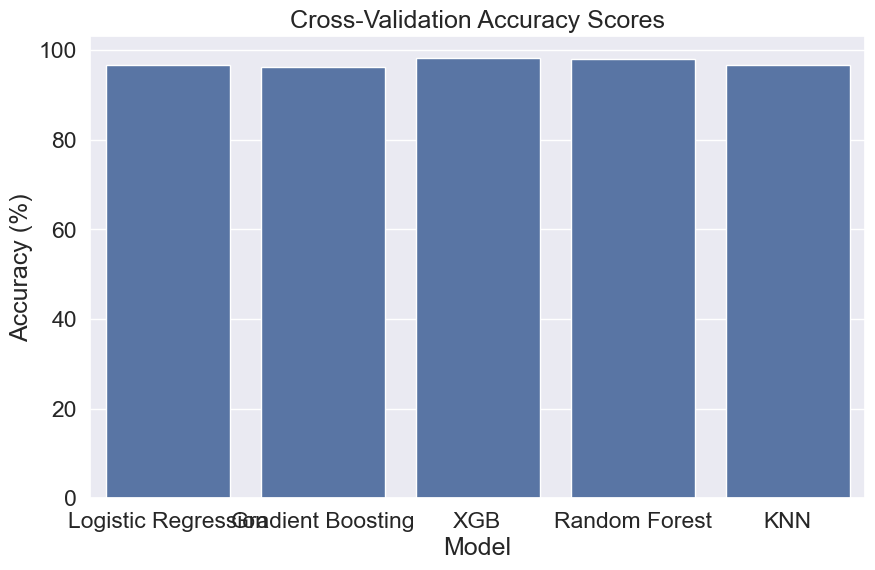

In [143]:
cv_results = {'Model': [], 'Cross-Validation Score': []}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results['Model'].append(name)
    cv_results['Cross-Validation Score'].append(np.mean(scores) * 100)

cv_results_df = pd.DataFrame(cv_results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Cross-Validation Score', data=cv_results_df)
plt.title('Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy (%)')
plt.show()


##### Training and Test Scores

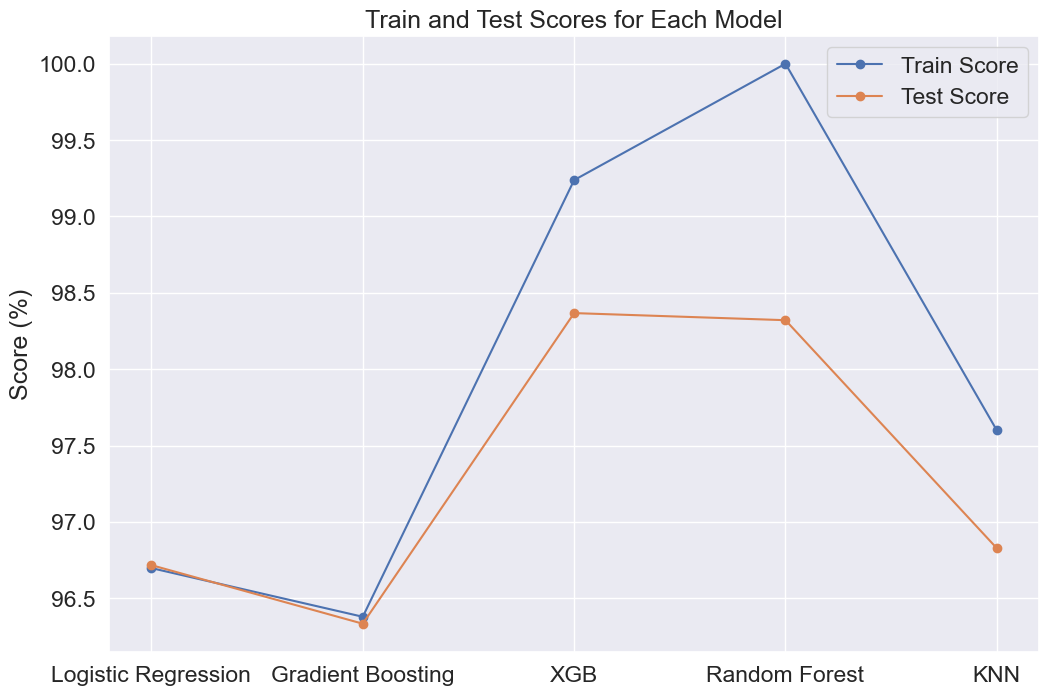

In [144]:
train_results = {'Model': [], 'Train Score': [], 'Test Score': []}

for name, model in models.items():
    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    
    train_results['Model'].append(name)
    train_results['Train Score'].append(train_score)
    train_results['Test Score'].append(test_score)

train_results_df = pd.DataFrame(train_results)

plt.figure(figsize=(12, 8))
plt.plot(train_results_df['Model'], train_results_df['Train Score'], label='Train Score', marker='o')
plt.plot(train_results_df['Model'], train_results_df['Test Score'], label='Test Score', marker='o')
plt.title('Train and Test Scores for Each Model')
plt.ylabel('Score (%)')
plt.legend()
plt.show()



##### Generate and plot Learning Curves

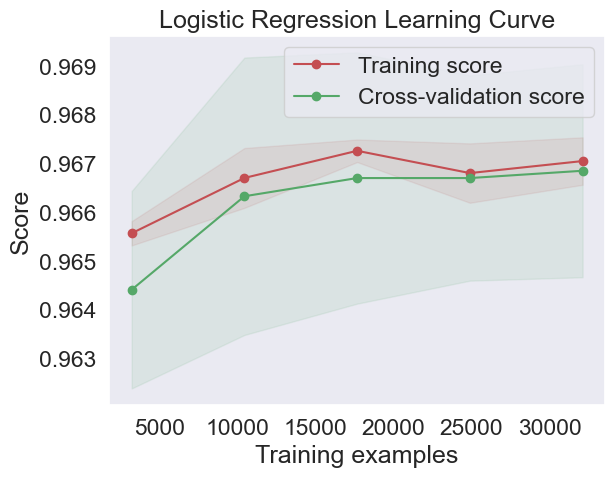

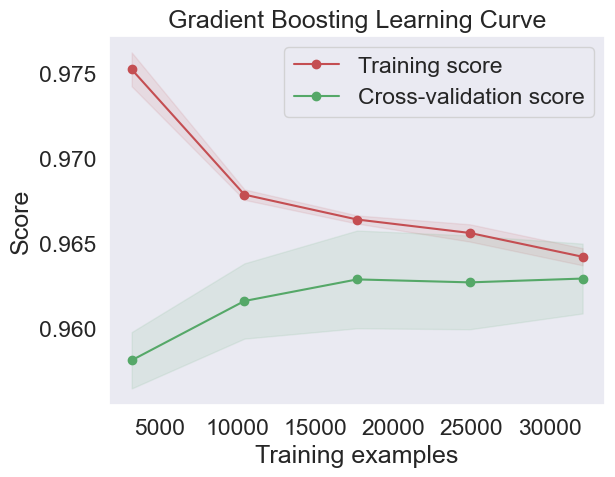

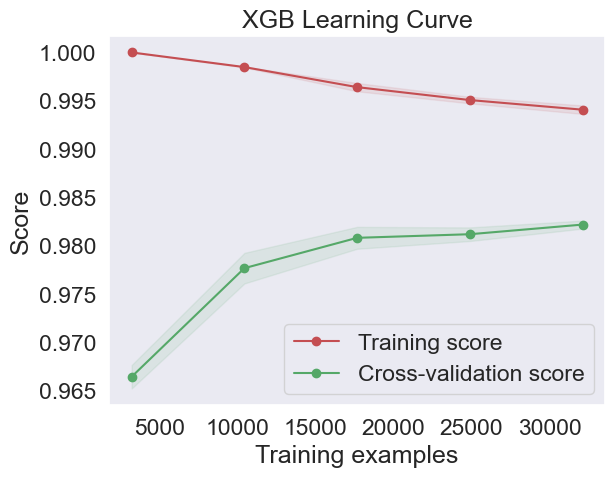

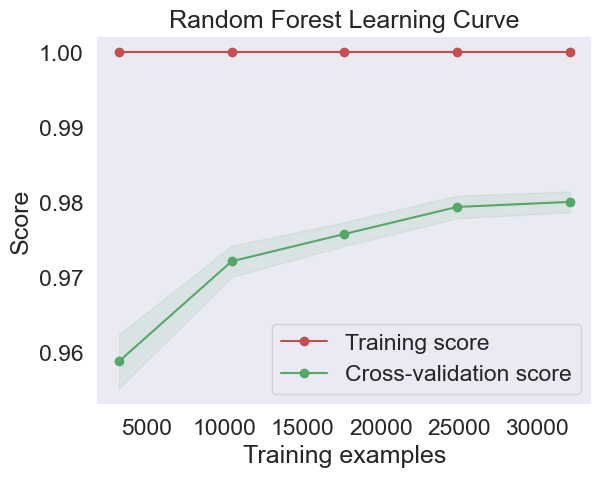

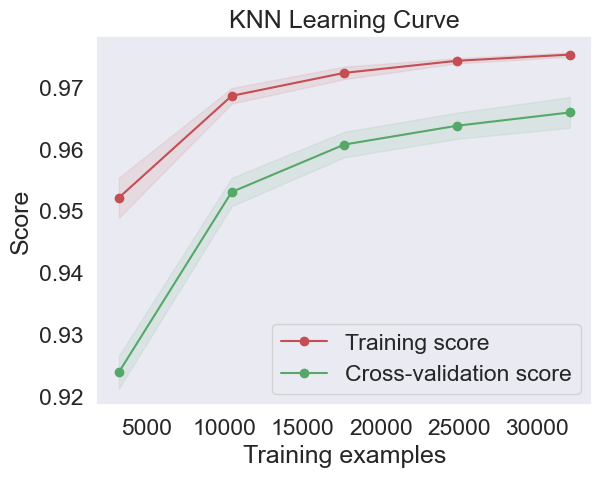

In [145]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()

# Assuming X_train, y_train are defined

for name, model in models.items():
    plot_learning_curve(model, f"{name} Learning Curve", X_train, y_train, cv=5, n_jobs=4)

##### Feature Importance

Random Forest

In [146]:
# Extract feature importances
feature_importances_rf = pd.DataFrame(rf.feature_importances_,
                                      index=X.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
# Display top features
print("Top features for Random Forest:")
print(feature_importances_rf.head(10))


NameError: name 'rf' is not defined